# Elastic Search mit Docker



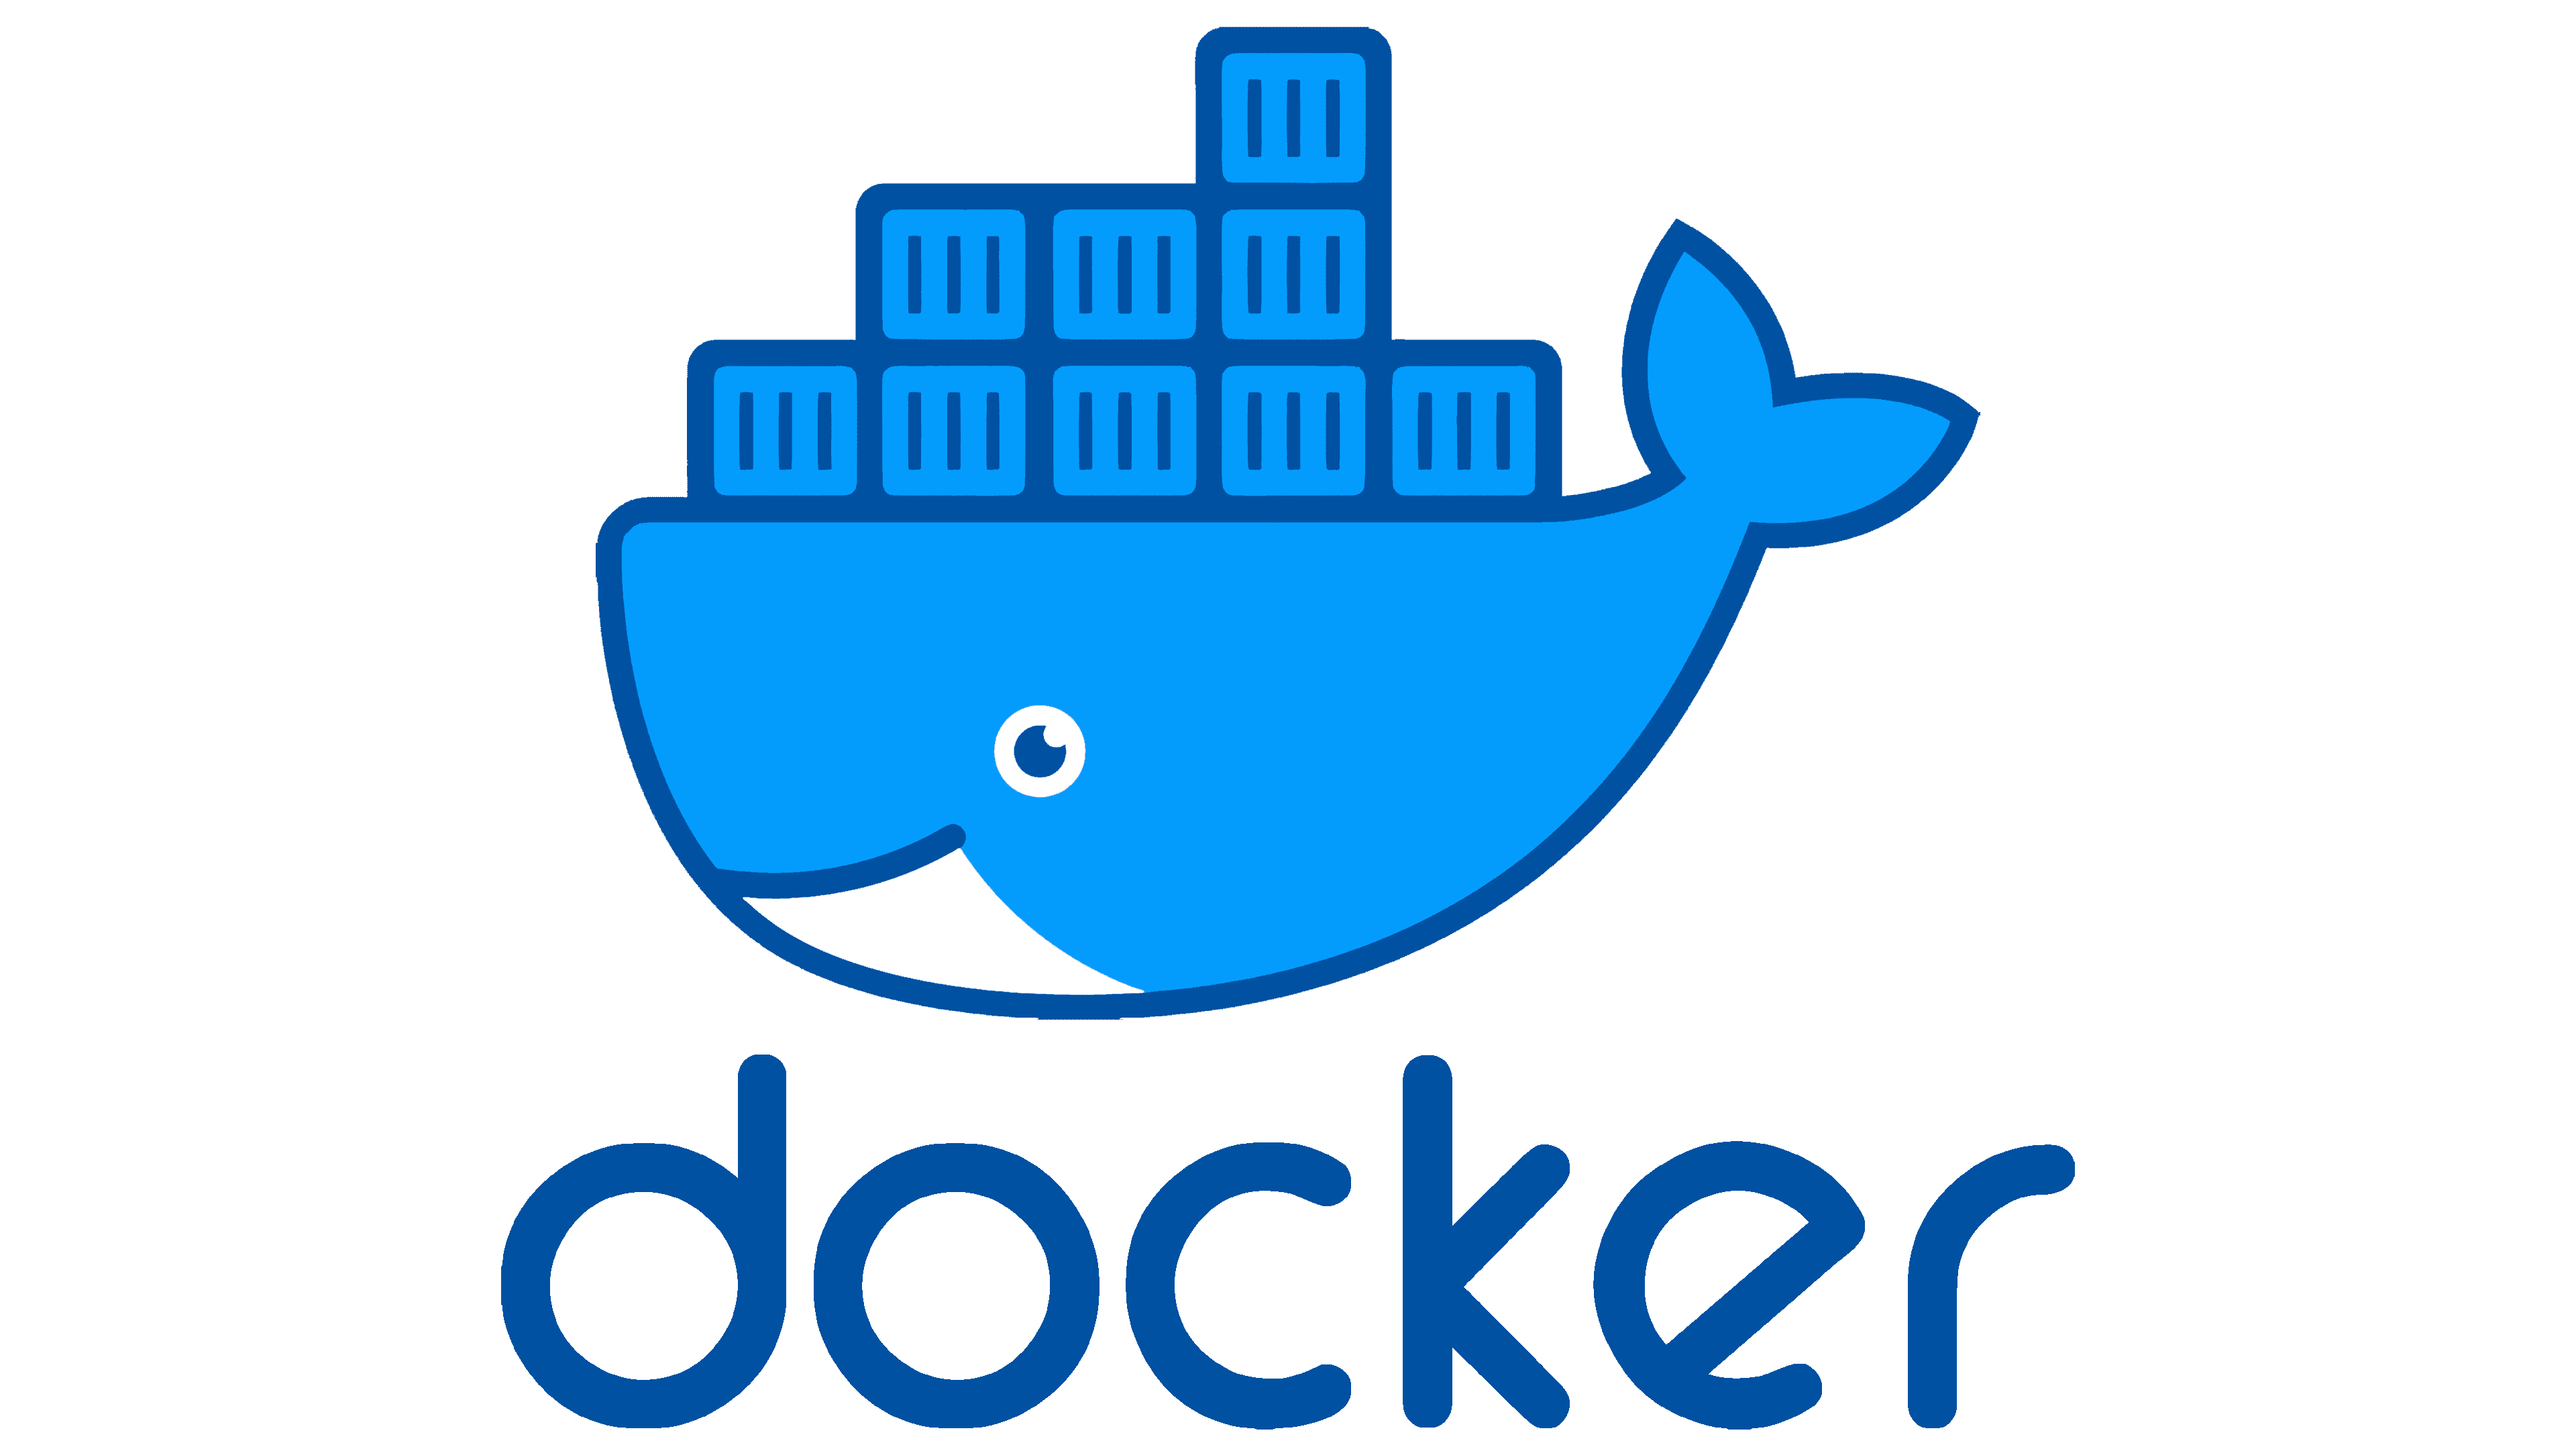

## Vorbereitung

* Bitte installieren Sie Docker Desktop.
  * Der Download ist [hier](https://www.docker.com/products/docker-desktop/) zu finden.
  * Achten Sie darauf die korrekte Version für ihr Betriebssystem herunterzuladen (Windows, Mac oder Linux).
* Bitte _zu Hause_ machen, um das Internet an der HdM zu schonen.

## War die Installation erfolgreich?

* Starten Sie Docker Desktop
* Überprüfen Sie:
  * ob die Docker Engine startet
  * öffnen Sie auch mal eine neue Kommandozeile/Terminal etc. und geben den Befehl ``docker`` ein. Wenn der Fehler wie in etwa: "Could not connect to docker daemon" kommt überprüfen Sie Ihre Installation.

# Inhalt

* Docker: Theorie
* Docker: Praxis
* Elastic Search mit Docker
* Kibana mit Docker

## Einordnung in die Pipeline

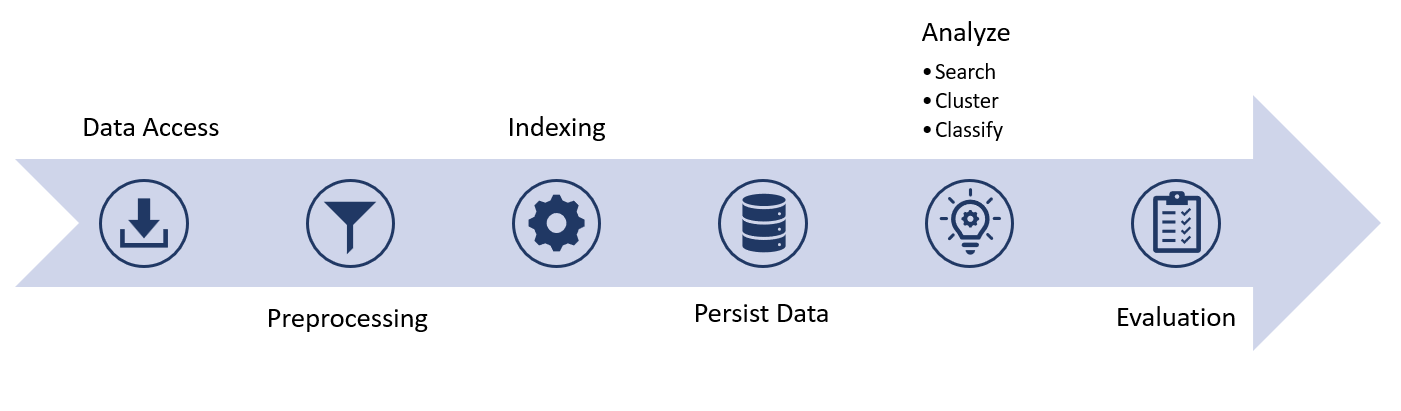

* Die Inhalte in diesem Notebook beziehen sich, wenn auch indirekt, auf Schritt 4, bzw. bilden die Vorbereitung für diesen.
* Hier geht es um das Aufsetzen der Infrastruktur für Elastic Search, Kibana etc. 
* Da diese Werkzeuge sehr mächtig sind und diese auch für Aufgaben aus den Schritten 2, 3, 4, 5 und 6 geeignet sind, ist dieses Notebook auch als Grundlage für Infrastruktur einger gesamten Datenlade und Datenverarbeitungspipeline zu verstehen.

## Use Case: Was müssen Sie tun, um Ihren Django-Webservice bei Ihren Eltern zum Laufen zu bekommen?

* Python installieren
* Erforderliche Python Module installieren, django etc.
* Konfigurieren
* Ihre Eltern haben Windows, Sie haben aber auf Mac entwickelt...

**Mit Docker wird der Aufwand und die Fehleranfälligkeit beim Installieren reduziert - die Software wird unabhängig von der Infrastruktur.**

## Was ist Docker?

* Die Idee von Docker beruht auf dem Trennen einer Anwendung von ihrer Laufzeitumgebung.
* Stellen Sie sich vor:
  * Ihr Computer ist ein großes Meer voller Unberechenbarkeiten, wie Stürmen etc.
  * Bisher treiben viele kleine Kutter (das sind die installierten Programme) umher.
  * Jeder Kutter bringt seine eigene Crew, Antrieb etc. mit.
* Docker vereinigt alle kleinen Kutter auf einem großen Frachter.
  

* Alle Programme laufen nun auf dem "Docker Frachter", dem Docker Host.
* Der Docker Host stellt alles bereit, was die Applikationen benötigen.
* Dabei werden gleiche Softwarekomponenten nur _1 Mal_ benötigt, da sei geteilt werden.
* z.B. haben Sie 2 Applikationen mit Python, wird Python nur 1 Mal heruntergeladen.
* Benötigen 2 Applikationen verschiedene Python Versionen, sind diese voneinander gekapselt. So kommen Sie sich nicht in die Quere.

## Warum Docker?

* Sie werden Betriebssystem-unabhängig
* Sie sparen viel Zeit beim Installieren der benötigten Software
* Sie müssen nicht viel manuell konfigurieren
* Sie benötigen keine zusätzliche Software wie Java etc.

## Docker: wichtige Begriffe

* Image: Die Software
* Container: Instanz eines Images: "Laufende Applikation"
  * Ein Image kann beliebig viele Container haben.
* Docker Host: Docker
* Docker Daemon: Schnittstelle für das Starten von Containern etc.

**"Docker ist ein Frachtschiff das nun mit vielen Containern beladen werden kann"**

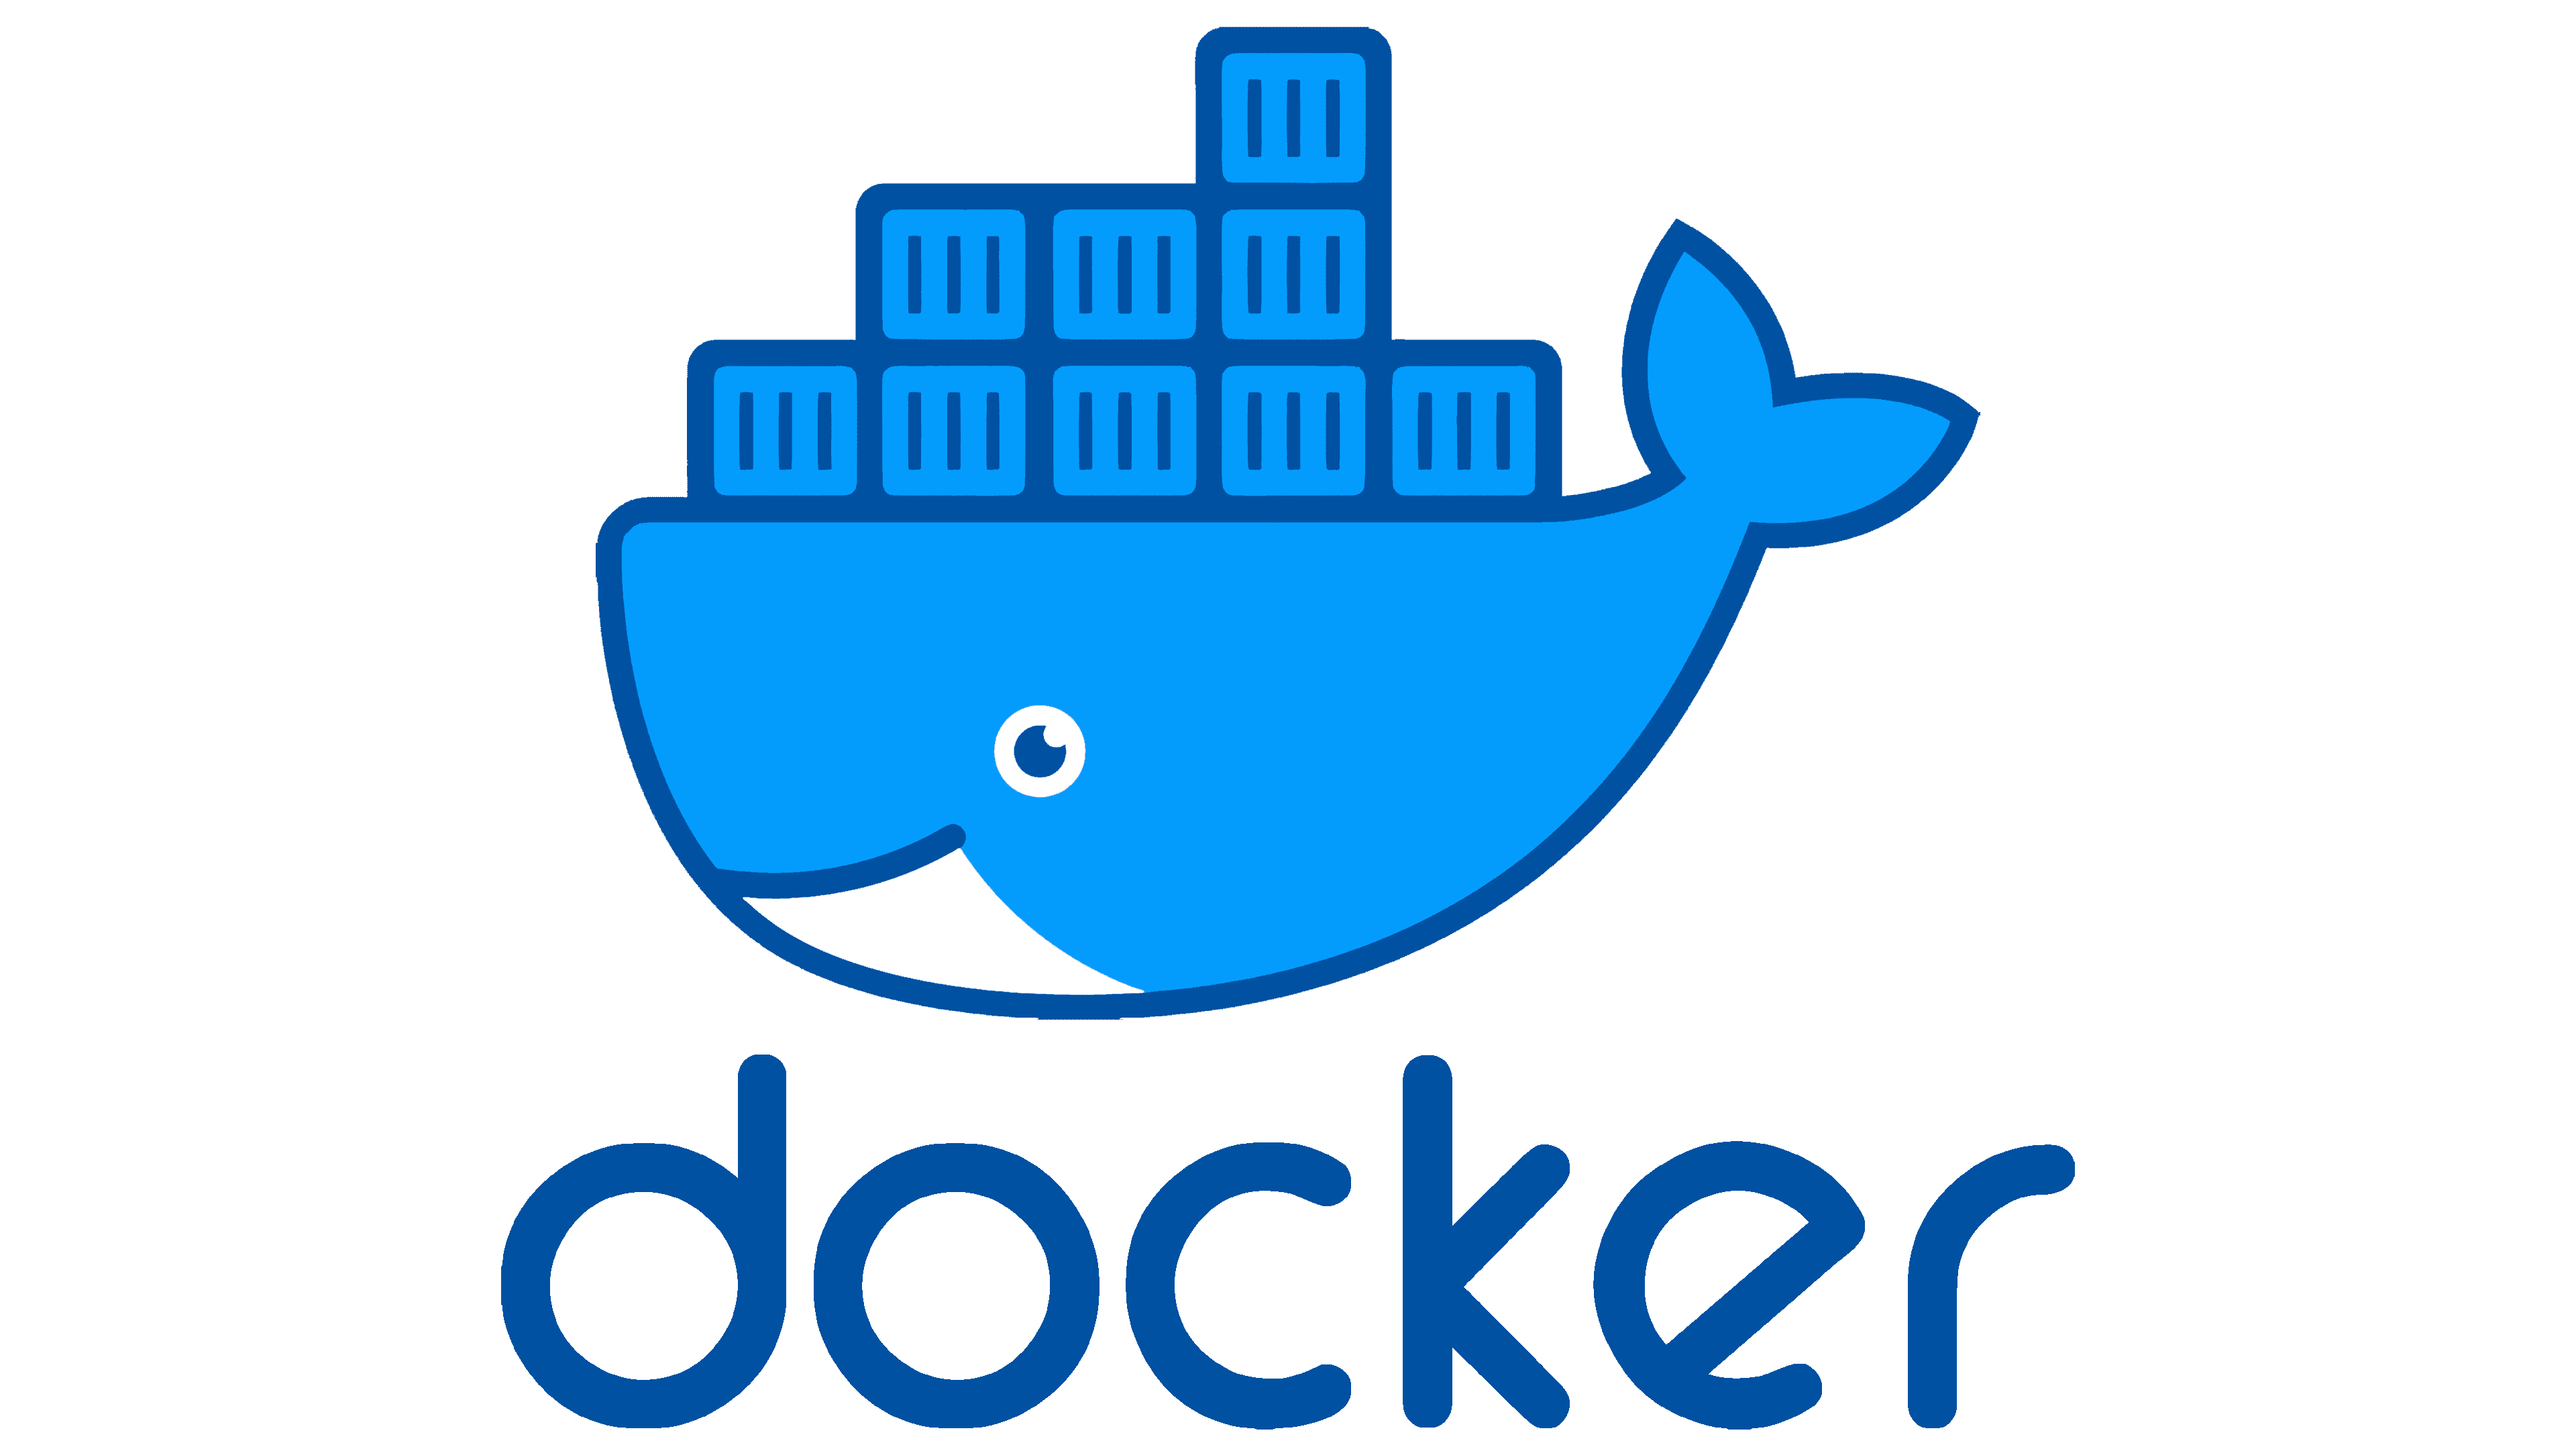

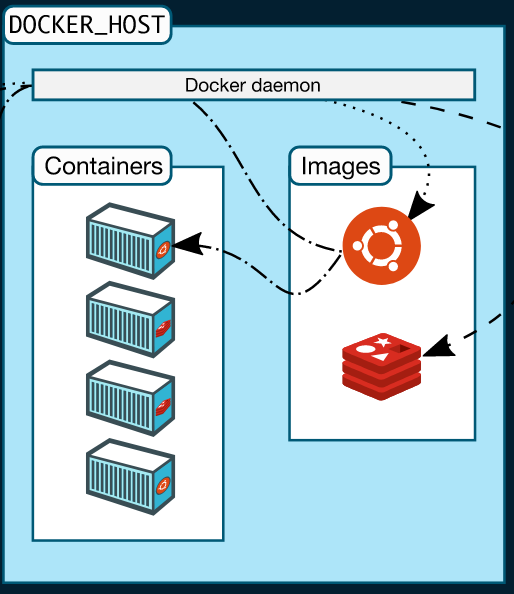

Quelle: Docker.com

## Docker Schnittstellen

* Sie haben verschiedene Möglichkeiten Docker zu bedienen:
  * Die Kommandozeile: Sie ist die mächtigste Möglichkeit und umfasst **alle** Funktionen. Alle anderen Möglichkeiten sind nur Wrapper.
  * Docker-Python Modul: Sprechen Sie Docker direkt aus Python an.
  * Docker Desktop GUI: Schicke GUI, nützlich für die Übersicht der heruntergeladenen Images und laufenden Container. **Jedoch:** umfasst nicht alle benötigten Funktionen, z.B. keine Möglichkeit Images zu pullen.

## Docker Workflow

In den Beispielen hier nutze ich die Kommandozeilen-Befehle und/oder die Python-API.

1. Download des benötigten Images (Pulling): ``docker pull <image>``.
2. Starten des Images ([run](https://docs.docker.com/engine/reference/commandline/run/)): ``docker run -d -p 80:80 <image> --name <my-container>``.
  * wichtig ist hier der ``-p``-Parameter: damit wird die Portfreigabe geregelt. Webanwendungen, wie auch Elasticsearch, sind auf einem Port erreichbar. Sie kennen das bereits von Django oder Jupyter Notebook/Lab. Hier müssen wir angeben welcher Port nach aussehen hin (also außerhalb des Containers) erreichbar sein soll. In diesem Beispiel wird der interne Port 80 auf den externen Port 80 freigeschalten.
3. Daraufhin wird aus dem Image ein Container erstellt und gestartet. Der Container bekommt den Namen den man für ``my-container`` angibt. Tut man dies nicht wird eine zufällige ID vergeben. Es macht Sinn den Containern Namen zu geben um sie später wieder zu finden, insbesondere für das Starten und Stoppen.
4. Werfen Sie einen Blick in die Docker Desktop GUI: Sie sollten unter Images das heruntergeladene Image sehen. Unter Container sehen sie alle erstellten Container. Der Container ``my-container`` sollte den Status running haben.
3. Stoppen des Containers: ``docker stop <my-container>``.
4. Starten eines existierenden Containers: ``docker start <my-container>``.

## Aufgaben

Hier geht es darum, das Elastic Search Image zu pullen und als Docker Container zu starten.

1. Pullen Sie das offizielle Elastic Search Image in der Version 8.0.1: ``docker.elastic.co/elasticsearc/elasticsearch:8.0.1`` . Bei Elastic ändert sich häufig etwas, daher wollen wir in der Veranstaltung alle auf der selben Version arbeiten.
2. Legen Sie ein neues Docker Network an (wird später erklärt): ``docker network create elastic``.
3. Starten Sie das Image. Vergeben Sie einen beliebigen Namen mit (ersetzen Sie my-container>): ``docker run --name <my-container> --net elastic -p 9200:9200 -p 9300:9300 docker.elastic.co/elasticsearch/elasticsearch:8.0.1``
4. Läuft Elastic? Gehen Sie auf localhost:9200 in Ihrem Browser.


